In [2]:
# Importing the required libraries and modules 
import re
import string
import spacy
import pandas as pd
# from syntactic_structure import find_syntactic_structure


import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize
from nltk.corpus import wordnet


from wordcloud import WordCloud
nltk.download('averaged_perceptron_tagger')
nltk.download('punkt')
nltk.download('omw-1.4')
from collections import Counter
from collections import OrderedDict

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /usr/share/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /usr/share/nltk_data...


In [3]:
# Function which returns string containing contents of .txt file at file_path
def txt_file_to_string(file_path):  
    with open(file_path, "r", encoding = "utf8") as curr:
        text = curr.read()
        text = text.replace("\n", " ").replace("\r", " ")
    return text

In [4]:
# T1
book_one_path = "../input/processed-text-1/processed_text_1.txt"
Original_T1 = txt_file_to_string(book_one_path)
# Original_T1

In [5]:
# Funtion for POS_Tagging of Book parameter which is of string type
def POS_Tagging(Book):
    words= [word_tokenize(i) for i in sent_tokenize(Book)]
    pos_tag= [nltk.pos_tag(i) for i in words]
    return pos_tag

In [6]:
# Function which extracts and returns lists of nouns and verbs in the Book whose pos_tag is given as parameter 
def extract_nouns_and_verbs(pos_tag):
    nouns = set()
    verbs = set()
    for sent in pos_tag:
        for word, tag in sent:

            word = word.lower()
            word = re.sub(r"[^\w\s]", "", word)
            word = re.sub(r"_", "", word)
            wordnet_cat = wordnet.NOUN

            if tag[0] == 'J':
                wordnet_cat = wordnet.ADJ
            elif tag[0] == 'V':
                wordnet_cat = wordnet.VERB
            elif tag[0] == 'N':
                wordnet_cat = wordnet.NOUN
            elif tag[0] == 'R':
                wordnet_cat = wordnet.ADV

            lemmatizer = WordNetLemmatizer()
            word = lemmatizer.lemmatize(word, wordnet_cat)

            if(tag[0] == 'N'):
                nouns.add(word)
            elif(tag[0] == 'V'):
                verbs.add(word)
    return list(nouns), list(verbs)

In [7]:
# Tagging book and extracting nouns and verbs in it
B1 = Original_T1
Tagged_B1 = POS_Tagging(B1)
Nouns_B1, Verbs_B1 = extract_nouns_and_verbs(Tagged_B1)

In [8]:
# Function to plot histograms of frequencies of different categories of nouns and verbs in the book
def plot_for_frquency_distribution(fd, title):
    data = {}
    for i in fd.keys():
        j = i[5:] # Removing prefix of type "noun." OR "verb."
        if j not in data.keys():
            data[j] = fd[i]
        else:
            data[j] += fd[i]

    X = []
    Y = []

    for i in data.keys():
        X.append(i)
    for i in X:
        Y.append(data[i])

    # Plotting a bar graph for recorded data

    plt.figure(figsize = (20, 20))
    font = {'family':'serif','color':'darkred','size':25}
    plt.bar(X, Y, tick_label=X, width=0.8, color=['blue'])
    plt.xlabel('Category in WordNet', fontdict = font)
    plt.ylabel('Frequency', fontdict = font)
    plt.xticks(rotation=90)
    plt.title(title, fontdict = font, loc = "center")
    plt.show()

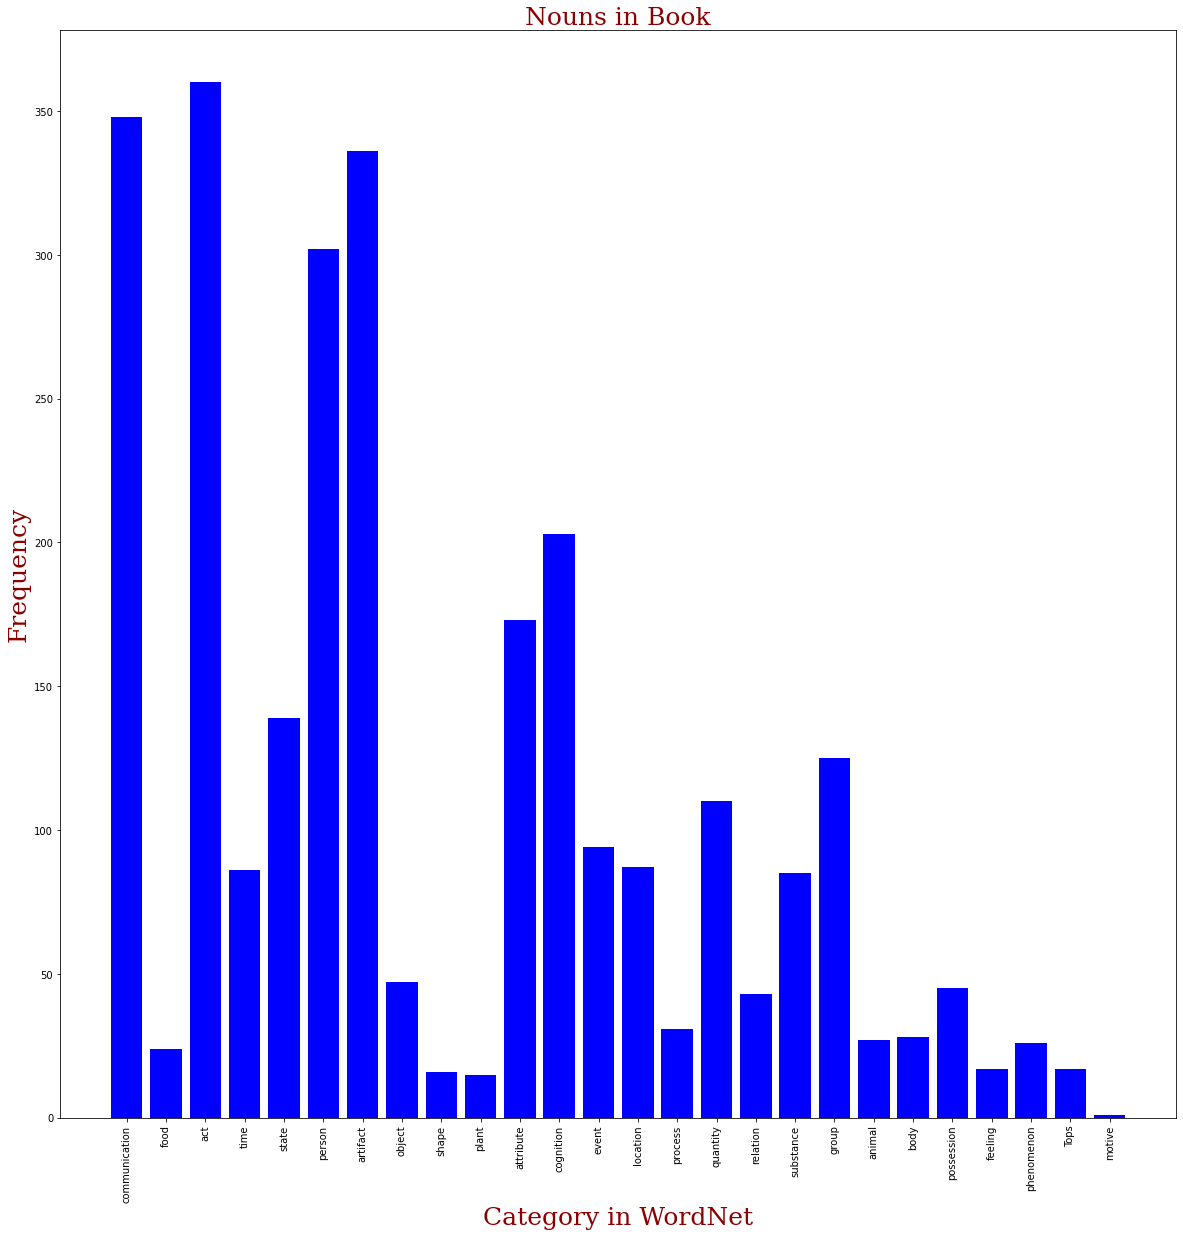

In [9]:
# for nouns in book
category_list = []
for word in Nouns_B1:
    syn = wordnet.synsets(word, pos = wordnet.NOUN)
    if len(syn) > 0:
        category_list.append(syn[0].lexname())

plot_for_frquency_distribution(FreqDist(category_list), "Nouns in Book")

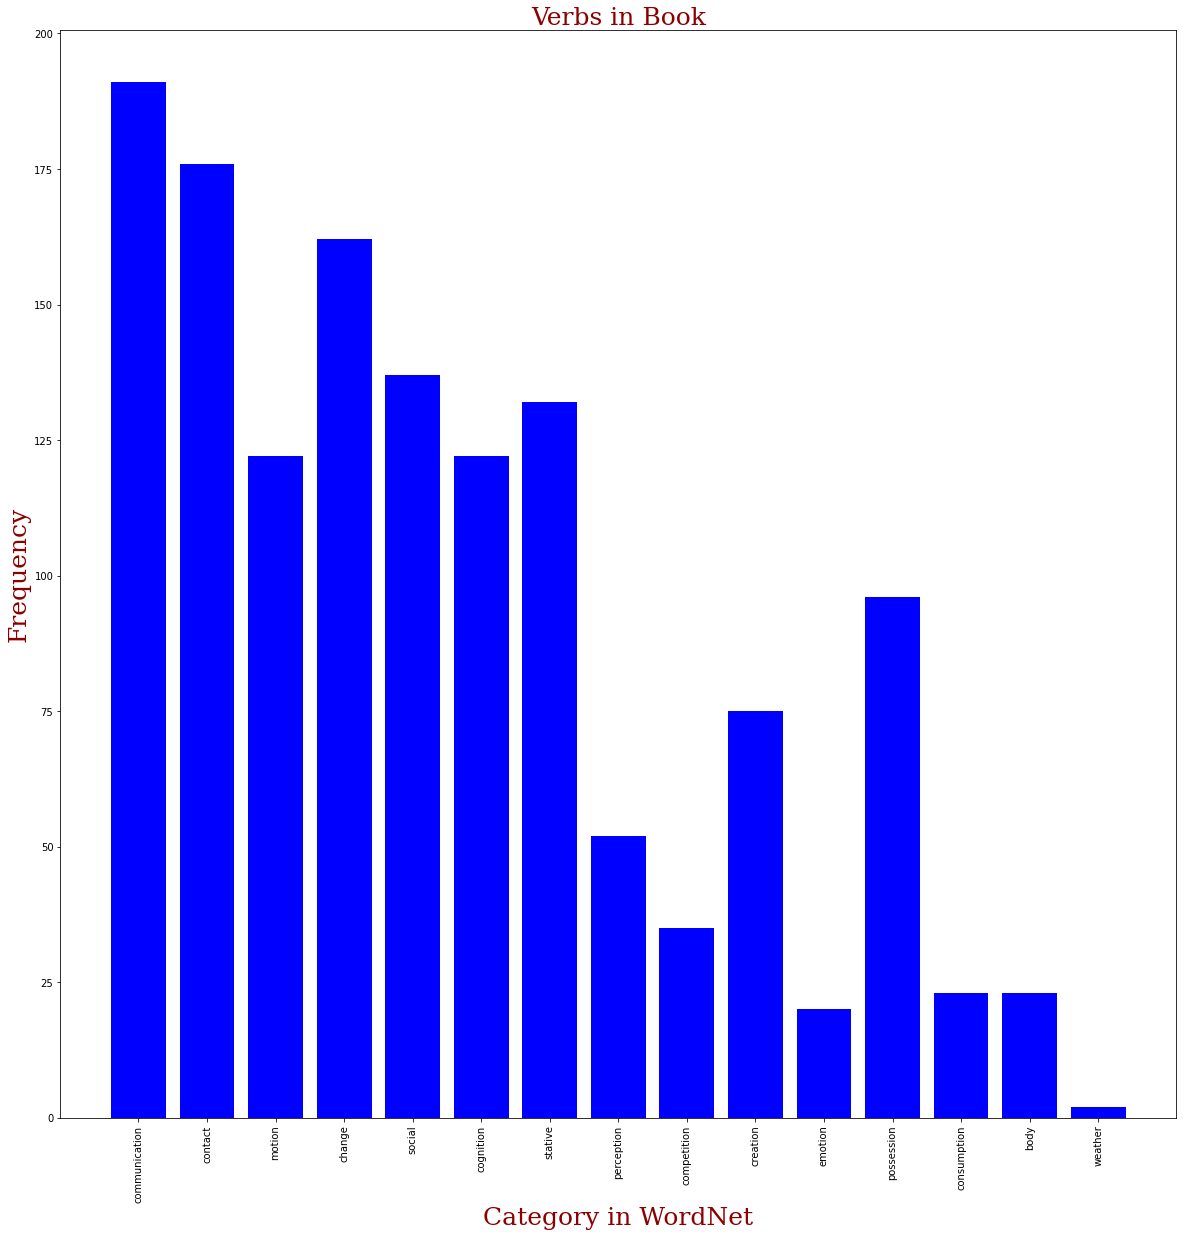

In [10]:
# for verbs in book
category_list = []
for word in Verbs_B1:
    syn = wordnet.synsets(word, pos = wordnet.VERB)
    if len(syn) > 0:
        category_list.append(syn[0].lexname())

plot_for_frquency_distribution(FreqDist(category_list), "Verbs in Book")

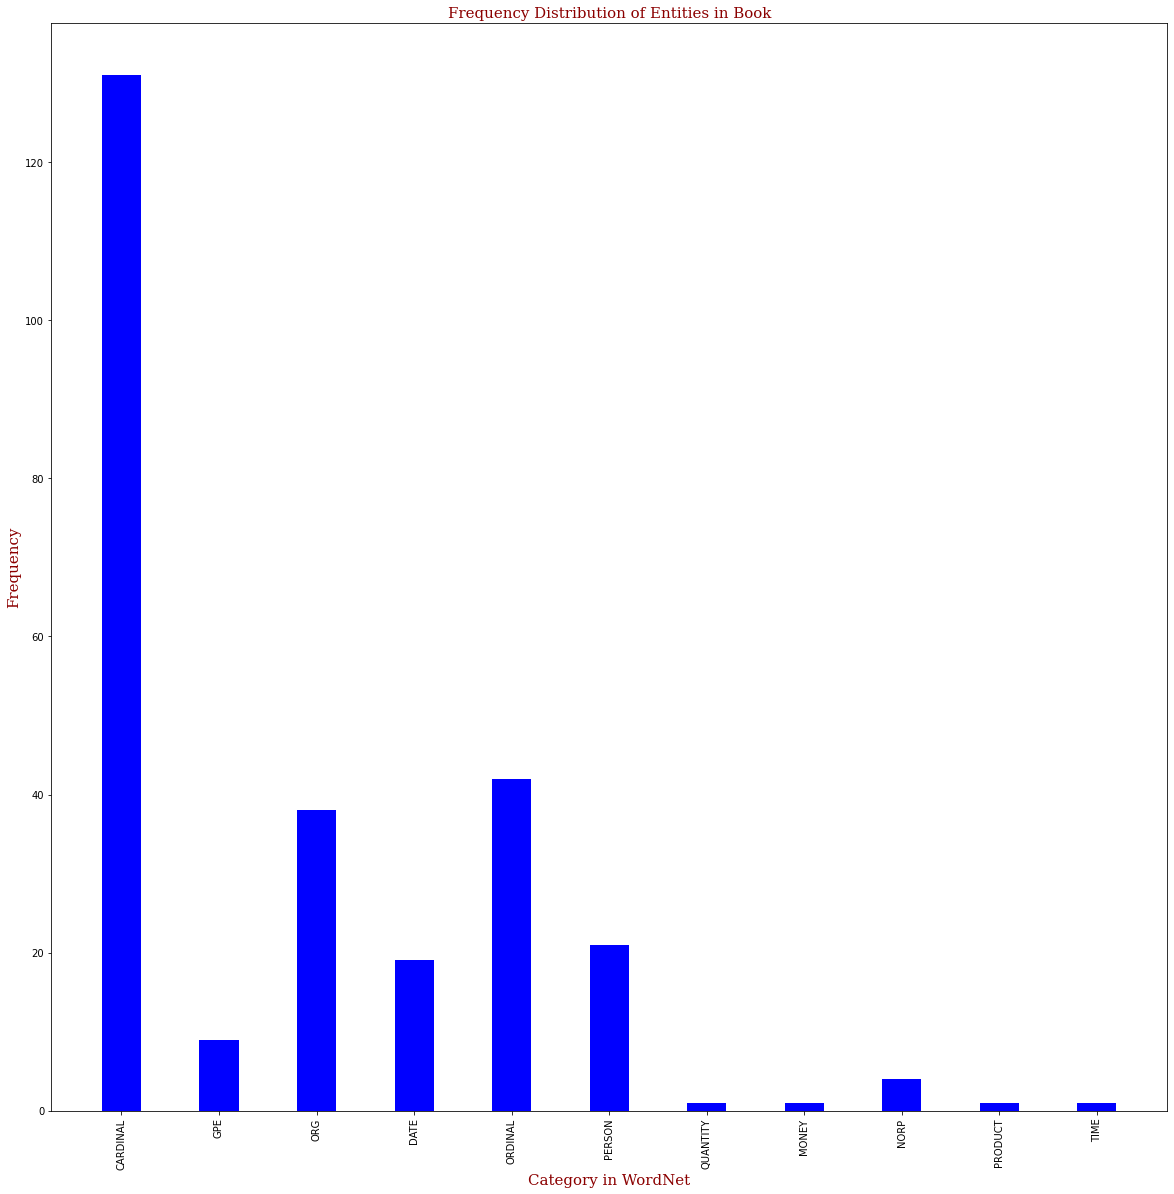

In [11]:
B1 = Original_T1[0:200000]
nlp = spacy.load('en_core_web_sm')
nlp.max_length = 399999  # or even higher

# Identify the entities in the text
doc = nlp(''.join(B1))
# doc1=B1
# Count the number of occurrences of each entity label
entity_counts = Counter([entity.label_ for entity in doc.ents])

X = []
Y = []

for i in entity_counts.keys():
    X.append(i)
for i in entity_counts.values():
    Y.append(i)

    # Plotting a bar graph for recorded data

plt.figure(figsize = (20, 20))
font = {'family':'serif','color':'darkred','size':15}
plt.bar(X, Y, tick_label=X, width=0.4, color=['blue'])
plt.xlabel('Category in WordNet', fontdict = font)
plt.ylabel('Frequency', fontdict = font)
plt.xticks(rotation=90)
plt.title("Frequency Distribution of Entities in Book", fontdict = font, loc = "center")
plt.show()


In [12]:
# Testing
def test_for_text(text):
    car = set()
    ordi = set()
    org = set()
    doc = nlp(''.join(text))
    # Iterate over the entities and print their text and label
    for entity in doc.ents:
        print(f"{entity.text}: {entity.label_}")
        if (entity.label_ == 'CARDINAL'):
            car.add(entity.text)
        elif (entity.label_ == 'ORDINAL'):
            ordi.add(entity.text)
        elif (entity.label_ == 'ORG'):
            org.add(entity.text)
    print(car)
    print(ordi)
    print(org)

In [13]:
text1 = """an operating system is a program that manages the computer hardware it also provides a basis for application programs and acts as an intermediary between the computer user and the computer hardware an amazing aspect of operating systems is how varied they are in accomplishing these tasks mainframe operating systems are designed primarily to optimize utilization 
of hardware personal computer pc operating systems support complex games business applications and everything in between operating systems for handheld computers are designed to provide an environment in which a 
user can easily interface with the computer to execute programs thus some operating systems are designed to be convenient others to be efficient and others 
some combination of the two before we can explore the details of computer system operation we need to know something about system structure we begin by discussing the basic 
functions of system startup i and storage we also describe the basic computer architecture that makes it possible to write a functional operating system because an operating system is large and complex it must be created 
piece by piece each of these pieces should be a well delineated portion of the system with carefully defined inputs outputs and functions in this chapter we provide a general overview of the major components of an operating 
system to provide a grand tour of the major components of operating systems 
to describe the basic organization of computer systems we begin our discussion by looking at the operating system s role in the overall computer system a computer system can be divided roughly into 
 chapter 
compiler assembler text editor operating system database system 
figure abstract view of the components of a computer system 
four components the hardware the operating system the application programs 
and the users figure  
the hardwa te the the and the 
basic computing resources for the 
system the as word processors spreadsheets 
compilers and web browsers define the ways in which these resources are 
used to solve users computing problems the operating system controls the 
hardware and coordinates its use among the various application programs for 
the various users 
we can also view a computer system as consisting of hardware software 
and data the operating system provides the means for proper use of these 
resources in the operation of the computer system an operating system is 
similar to a government like a government it performs no useful function by 
itself it simply provides an environment within which other programs can do 
useful work 
to understand more fully the operating systemfs role we next explore 
operating systems from two viewpoints that of the user and that of the system 
 user view 
the user s view of the computer varies according to the interface being 
used most computer users sit in front of a pc consisting of a monitor 
keyboard mouse and system unit such a system is designed for one user 
to monopolize its resources the goal is to maximize the work or play that 
the user is performing in this case the operating system is designed mostly 
for with some attention paid to performance and none paid 
to various hardware and software resources are 
shared performance is of course important to the user but such systems  
are optimized for the single user experience rather than the requirements of 
multiple users 
in other cases a user sits at a terminal connected to a or a 
other users are accessing the sance computer through other 
terminals these users share resources and may exchange information the 
operating system in s llclc cases is designed to maximize resource utilization­
to assure that all available cpu time memory and i are used efficiently and 
tbat no individual user takes more than her fair share 
in still otber cases users sit at connected to networks of 
other workstations and these users have dedicated resources at their 
disposal but they also share resources such as networking and servers file 
compute and print servers therefore their operating system is designed to 
compromise between individual usability and resource utilization 
recently many varieties of handheld computers have come into fashion 
most of these devices are standalone units for individual users some are 
connected to networks either directly by wire or more often through wireless 
modems and networking because of power speed and interface limitations 
they perform relatively few remote operations their operating systems are 
designed mostly for individual usability but performance per unit of battery 
life is important as well."""
text1 = re.sub(r"[\s]+", " ", text1)
test_for_text(text1)

two: CARDINAL
four: CARDINAL
two: CARDINAL
keyboard mouse: PERSON
one: CARDINAL
{'two', 'one', 'four'}
set()
set()


In [14]:
text2 = """in one approach the command interpreter itself contains the code to 
execute the command for example a command to delete a file may cause 
the command interpreter to jump to a section of its code that sets up the 
parameters and makes the appropriate system call in this case the number of 
comn lands that can be given determines the size of the command interpreter 
since each command requires its own implementing code 
an alternative approach used by unix among other operating systems 
 implements most commands through system programs in this case the 
command interpreter does not understand the cmnmand in any way it merely 
uses the command to identify a file to be loaded into memory and executed 
thus the unix command to delete a file 
rm file txt 
would search for a file called rm load the file into memory and execute it with 
the parameter file txt the function associated with the rm command would 
be defined completely by the code in the file rm in this way programmers can 
add new commands to the system easily by creating new files with the proper 
figure the bourne shell command interpreter in solaris i 
names the command interpreter program which can be small does not have 
to be changed for new commands to be added 
 graphical user interfaces 
a second strategy for interfacing with the operating system is through a user­
friendly graphical user interface or cui here rather than entering commands 
directly via a command line interface users employ a mouse based window 
and nl enu system characterized by a metaphor the user moves the 
mouse to position its pointer on images or on the screen the desktop 
that represent programs files directories and system functions depending 
on the mouse pointer s location clicking a button on the mouse can invoke a 
program select a file or directory known as a folder or pull down a menu 
that contains commands 
graphical user interfaces first appeared due in part to research taking place 
in the early s at xerox parc research facility the first cui appeared on 
the xerox alto computer in however graphical interfaces became more 
widespread with the advent of apple macintosh computers in the s the 
user interface for the macintosh operating system mac os has undergone 
various changes over the years the most significant being the adoption of 
the aqua interface that appeared with mac os x microsoft s first version of 
windows version was based on the addition of a cui interface to the 
ms dos operating system later versions of windows have made cosmetic 
changes in the appearance of the cui along with several enhancements in its 
functionality including windows explorer chapter traditionally unix systencs have been dominated by command line inter."""
text2 = re.sub(r"[\s]+", " ", text2)
test_for_text(text2)

one: CARDINAL
second: ORDINAL
first: ORDINAL
xerox: ORG
first: ORDINAL
mac: ORG
the years: DATE
mac: ORG
{'one'}
{'first', 'second'}
{'mac', 'xerox'}


In [15]:
text3 = """the primary advantage of an acyclic graph is the relative simplicity of the 
algorithms to traverse the graph and to determine when there are no more 
references to a file we want to avoid traversing shared sections of an acyclic 
graph twice mainly for performance reasons if we have just searched a major 
shared subdirectory for a particular file without finding it we want to avoid 
searching that subdirectory again the second search would be a waste of time 
if cycles are allowed to exist in the directory we likewise want to 
avoid searching any component twice for reasons of correctness as well as 
performance a poorly designed algorithm might result in an infinite loop 
continually searching through the cycle and never terminating one solution 
is to limit arbitrarily the number of directories that will be accessed during a 
search 
a similar problem exists when we are trying to determine when a file 
can be deleted with acyclic graph directory structures a value of in the 
reference count means that there are no more references to the file or directory 
figure general graph directory 
 chapter 
 and the file can be deleted however when cycles exist the reference count 
may not be even when it is no longer possible to refer to a directory or file 
this anomaly results from the possibility of self referencing or a cycle in the 
directory structure in this case we generally need to use a garbage collection 
scheme to determine when the last reference has been deleted and the disk 
space can be reallocated garbage collection involves traversing the entire file 
system marking everything that can be accessed then a second pass collects 
everything that is not marked onto a list of free space a similar marking 
procedure can be used to ensure that a traversal or search will cover everything 
in the file system once and only once garbage collection for a disk based file 
system however is extremely time consuming and is thus seldom attempted 
garbage collection is necessary only because of possible cycles in the graph 
thus an acyclic graph structure is much easier to work with the difficulty 
is to avoid cycles as new links are added to the structure how do we know 
when a new lirk will complete a cycle there are algorithms to detect cycles 
in graphs however they are computationally expensive especially when the 
graph is on disk storage a simpler algorithm in the special case of directories 
and links is to bypass links during directory traversal cycles are avoided and 
no extra overhead is incurred 
just as a file must be opened before it is used a file system must be mounted before 
it can be available to processes on the system more specifically the directory 
structure may be built out of multiple volumes which must be mounted to 
make them available within the file system name space 
the mount procedure is straightforward the operating system is given the 
name of the device and the location within the file structure 
where the file system is to be attached some operating systems require that a 
file system type be provided while others inspect the structures of the device 
and determine the type of file system typically a mount point is an empty 
directory for instance on a unix system a file system containing a user s home 
directories might be mounted as home then to access the directory structure 
within that file system we could precede the directory names with home as 
in home jane motmting that file system under users would result in the path 
name users jane which we could use to reach the same directory 
next the operating system verifies that the device contains a valid file 
system it does so by asking the device driver to read the device directory 
and verifying that the directory has the expected format finally the operating 
system notes in its directory structure that a file system is n ounted at the 
specified mount point this scheme enables the operating system to traverse 
its directory structure switching among file systems and even file systems of 
varying types as appropriate."""
text3 = re.sub(r"[\s]+", " ", text3)
test_for_text(text3)

second: ORDINAL
one: CARDINAL
second: ORDINAL
{'one'}
{'second'}
set()


In [16]:

def find_syntactic_structure(text, entity1, entity2):
  # Parse the text with the language model
  doc = nlp(text)

  # Initialize a list to store the syntactic structures
  structures = []

  # Iterate over the entities and the dependencies between them
  for entity in doc:
    if entity.text == entity1:
        for child in entity.children:
            if child.text == entity2:
              structures.append(child.dep_)
  
  return structures


In [19]:
text = Original_T1[0:200000]
nlp.max_length = 399999  # or even higher
nlp = spacy.load("en_core_web_sm")


# Find the syntactic structure between "command" and "interpreter" in the text
structures = find_syntactic_structure(text, "command", "interpreter")

# Print the result
print(f"The syntactic structure between command and interpreter in the text is: {structures}")


The syntactic structure between command and interpreter in the text is: []
